# <font color='Blue'>Task-5 To explore Business Analytics.Perform ‘Exploratory Data Analysis’ on the provided dataset


### <font color='Blue'>You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data? You can choose any of the tool of your choice

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pandas_profiling
import os
os.chdir(r"C:\Users\Rahul\Desktop\spark intern\task5")
import seaborn as sns


In [90]:
data = pd.read_csv(r"C:\Users\Rahul\Desktop\spark intern\task5\SampleSuperstore.csv")


# data Inspection

In [6]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Profiling using pandas profiling

In [7]:
report = pandas_profiling.ProfileReport(data)

In [8]:
report

In [9]:
# saving file
report.to_file(output_file = 'task5.html')

# No missing values in the dataset

In [10]:
data.isnull().sum()

Ship_Mode       0
Segment         0
Country         0
City            0
State           0
Postal_Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# create UDFs

In [15]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [16]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [70]:
# seperate categorical and continuous variables
data_conti_vars = data.loc[:, (data.dtypes == 'int32') | (data.dtypes == 'int64') | (data.dtypes == 'float64') ].apply(pd.to_numeric)
data_cat_vars = data.loc[:, (data.dtypes == 'object')]
data_conti_vars.dtypes

Postal Code      int64
Sales          float64
Quantity         int64
Discount       float64
Profit         float64
dtype: object

In [17]:
# alternate of .describe() for continuous variables
data_conti_vars.apply(continuous_var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Postal_Code,9994.0,0.0,5.515727e+08,55190.38,56430.50,32063.69,1.028080e+09,1040.00,2149.00,10009.00,10024.00,23223.00,56430.50,90008.00,94122.00,98006.00,98115.00,99301.00
Sales,9994.0,0.0,2.297201e+06,229.86,54.49,623.25,3.884345e+05,0.44,2.29,4.98,7.90,17.28,54.49,209.94,572.71,956.98,2481.69,22638.48
Quantity,9994.0,0.0,3.787300e+04,3.79,3.00,2.23,4.950000e+00,1.00,1.00,1.00,2.00,2.00,3.00,5.00,7.00,8.00,11.00,14.00
Discount,9994.0,0.0,1.561090e+03,0.16,0.20,0.21,4.000000e-02,0.00,0.00,0.00,0.00,0.00,0.20,0.20,0.40,0.70,0.80,0.80
Profit,9994.0,0.0,2.863970e+05,28.66,8.67,234.26,5.487780e+04,-6599.98,-319.26,-53.03,-15.47,1.73,8.67,29.36,89.28,168.47,580.66,8399.98


In [19]:
# alternate of .describe() for categorical variables
data_cat_vars.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
Ship_Mode,9994,0,Standard Class,5968,59.72
Segment,9994,0,Consumer,5191,51.94
Country,9994,0,United States,9994,100
City,9994,0,New York City,915,9.16
State,9994,0,California,2001,20.02
Region,9994,0,West,3203,32.05
Category,9994,0,Office Supplies,6026,60.3
Sub-Category,9994,0,Binders,1523,15.24


# Data Visualisation

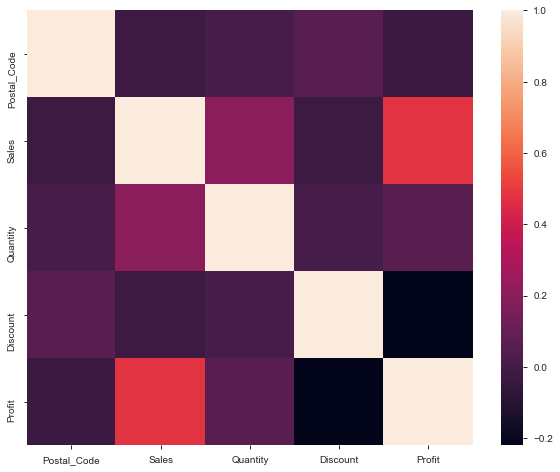

In [20]:
#correlation matrix (ranges from 1 to -1)
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr())
plt.show()

# Histogram of continous vars

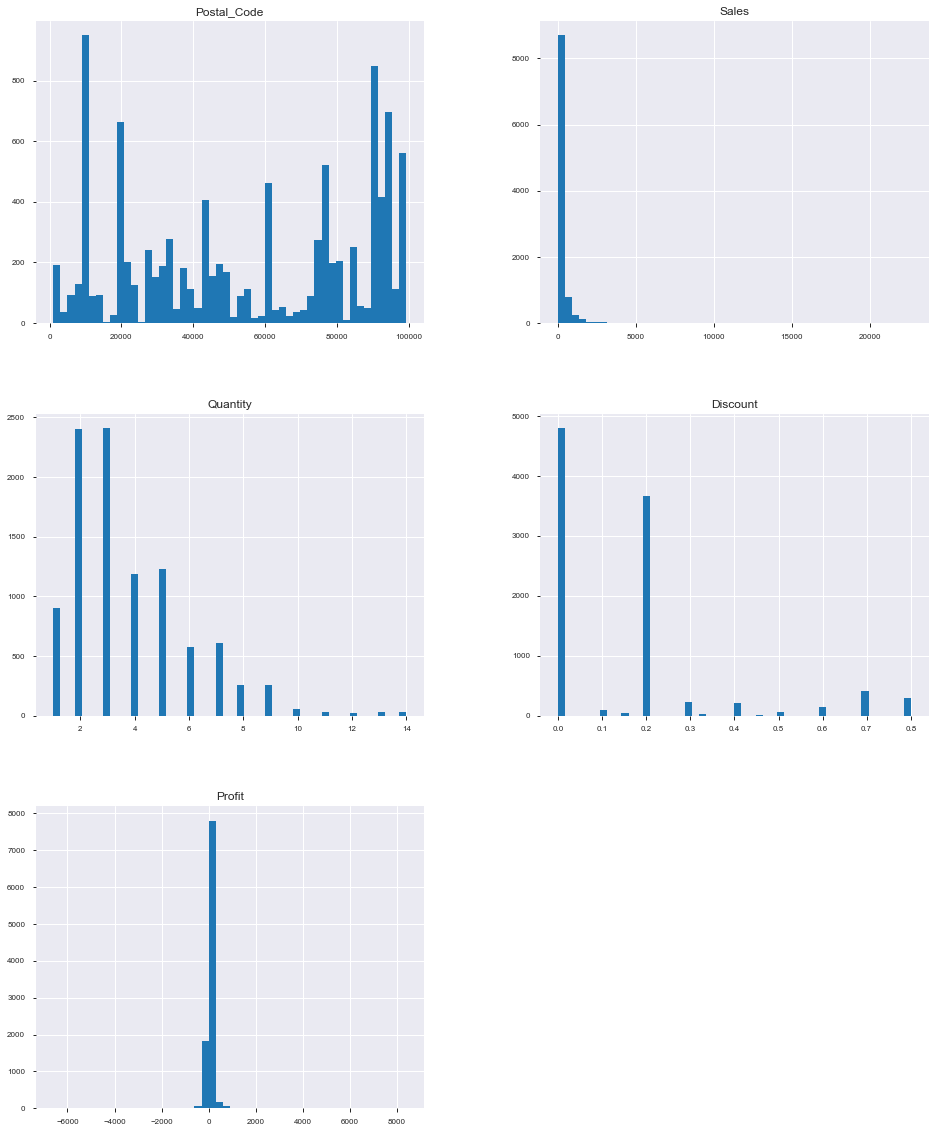

In [21]:
data_conti_vars.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

# Polar plot for continous variables

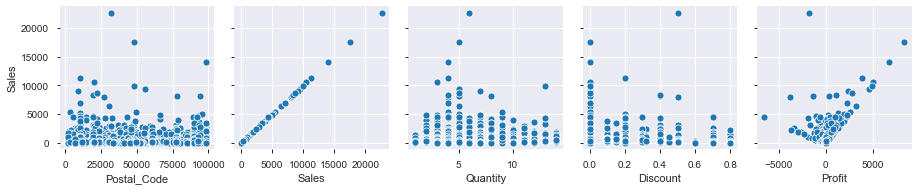

In [23]:
for i in range(0, len(data_conti_vars.columns), 5):
    sns.pairplot(data=data_conti_vars,
                x_vars=data_conti_vars.columns[i:i+5],
                y_vars=['Sales'])

# Region vs profit using pie plot

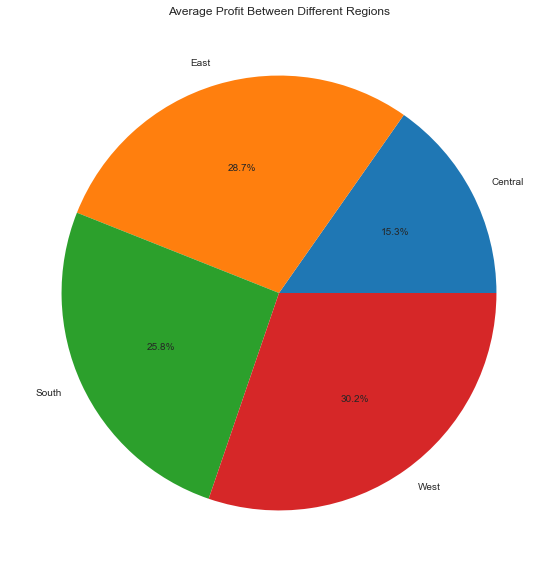

In [50]:
plt.figure(figsize= (10  , 10 ))
plt.pie(  pd.Series(data.groupby(['Region'])['Profit'].mean()), labels = regions  , autopct=     '%.1f%%'    )
plt.title("Average Profit Between Different Regions")
plt.show()

# State vs Count

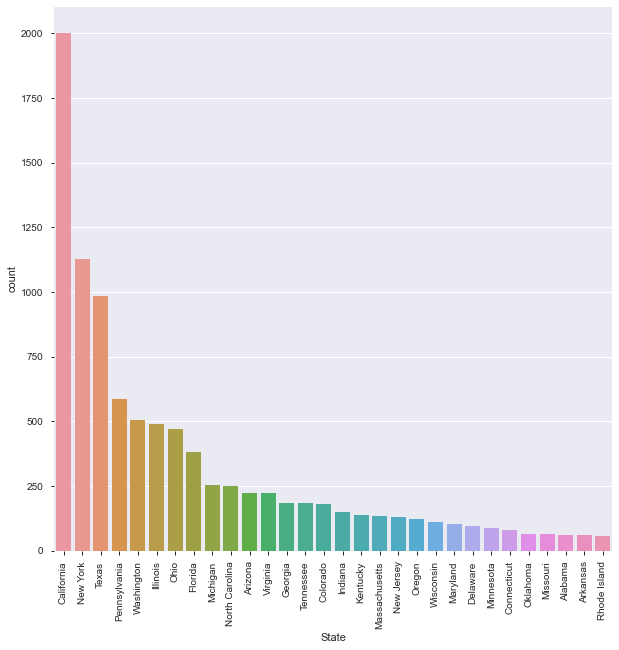

In [86]:
plt.figure(figsize= (10  , 10 ))
sns.countplot(data['State'],order=(data['State'].value_counts().head(30)).index)
plt.xticks(rotation=90)
plt.show()

# Total profit and sales


<Figure size 1440x1440 with 0 Axes>

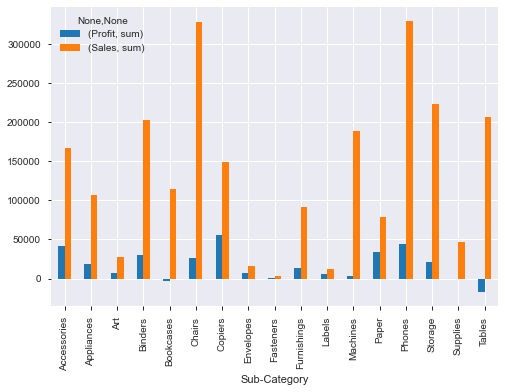

In [89]:
plt.figure(figsize= (20  , 20 ))
data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

# Conclusion

###  1.As we can see from the ploar plot sale is depend on each variables.
###  2. West is making highest profit among the reason.
###  3. California has highest sale and profit.
###  4. Chairs and phone generating more revenue.